In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

# 1. EDB Score 

In `data/DBData.csv`, you have the full "ease of doing business" dataset from the World Bank. Reformat it into the **Tidy Data** format, so one row is per-year-per-country

Result should look like:

![](EDB_unstack.png)

In [2]:
df_business = pd.read_csv('data/DBData.csv')

In [3]:
#Drop columns not required
df_business = df_business.drop(['Country Code', 'Indicator Code', 'Unnamed: 20'], 1)
#Select year columns
values = df_business.columns[2:len(df_business.columns)] 
#Reshape the dataframe 
df_business = pd.melt(df_business, id_vars=['Country Name', 'Indicator Name'],var_name='Year', value_vars=values).reset_index(drop = True)
#Drop duplicate rows
df_business = df_business.drop_duplicates()
#Reshape the dataframe 
df_pivot = df_business.pivot(columns = 'Indicator Name', values = 'value')
#Merge back dataframes
df_business = pd.merge(df_business[[ 'Year', 'Country Name']],df_pivot, left_index =True, right_index=True )
df_business = df_business.set_index(['Year', 'Country Name'])
#Drop rows with no data
df_business = df_business.dropna(how='all')
df_business = df_business.reset_index()
#Final result
df_business

,Year,Country Name,Dealing with construction permits (DB06-15 methodology) - Score,Dealing with construction permits (DB16-19 methodology) - Score,Dealing with construction permits: Building quality control index (0-15) (DB16-19 methodology),Dealing with construction permits: Building quality control index (0-15) (DB16-19 methodology) - Score,Dealing with construction permits: Cost (% of Warehouse value),Dealing with construction permits: Cost (% of Warehouse value) - Score,Dealing with construction permits: Liability and insurance regimes index (0-2) (DB16-19 methodology),Dealing with construction permits: Procedures (number),...,Trading across borders: Documents to export (number) (DB06-15 methodology),Trading across borders: Documents to export (number) (DB06-15 methodology) - Score,Trading across borders: Documents to import (number) (DB06-15 methodology),Trading across borders: Documents to import (number) (DB06-15 methodology) - Score,Trading across borders: Time to export (days) (DB06-15 methodology) - Score,Trading across borders: Time to export: Border compliance (hours) (DB16-19 methodology) - Score,Trading across borders: Time to export: Documentary compliance (hours) (DB16-19 methodology) - Score,Trading across borders: Time to import (days) (DB06-15 methodology) - Score,Trading across borders: Time to import: Border compliance (hours) (DB16-19 methodology) - Score,Trading across borders: Time to import: Documentary compliance (hours) (DB16-19 methodology) - Score
0,2004,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2004,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2004,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2004,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2004,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329482,2019,Zimbabwe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
329483,2019,Zimbabwe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,45.07,NaN,NaN,NaN,NaN
329484,2019,Zimbabwe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,42.01,NaN,NaN,NaN
329485,2019,Zimbabwe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.76,NaN


# 2 GDP and ease of doing business

Using the additional data in `data/GDPpc.csv`, join the clean dataset in **1** to the GDP data.

**What are the 3 Ease of Doing Business variables most closely linked to GDP?**

Answer by giving their correlation ratio, and give a possible explanation and a data visualization

**hint:** trying to do `df.corr()` or `sns.pairplot()` on the whole dataset will crash most computers. Be smart about the number of columns you're testing at once.

In [4]:
gdp = pd.read_csv('data/GDPpc.csv')

In [5]:
gdp = gdp.drop(['Country Code', 'Indicator Code'], 1)
# One row per country per year with GDP
gdp = pd.DataFrame(
        gdp.pivot(index='Indicator Name', 
                 columns='Country Name'
      ).unstack(
      ).reset_index(drop=False)
)
gdp = gdp.drop('Indicator Name', 1)
gdp.columns = ['Year', 'Country', 'GDPperCap']
gdp = gdp.dropna()


In [6]:
new_df = pd.merge(gdp, df_business,  how='inner', left_on=['Year','Country'], right_on = ['Year','Country Name'])

In [7]:
pd.set_option('display.max_columns', None)
new_df.head()

,Year,Country,GDPperCap,Country Name,Dealing with construction permits (DB06-15 methodology) - Score,Dealing with construction permits (DB16-19 methodology) - Score,Dealing with construction permits: Building quality control index (0-15) (DB16-19 methodology),Dealing with construction permits: Building quality control index (0-15) (DB16-19 methodology) - Score,Dealing with construction permits: Cost (% of Warehouse value),Dealing with construction permits: Cost (% of Warehouse value) - Score,Dealing with construction permits: Liability and insurance regimes index (0-2) (DB16-19 methodology),Dealing with construction permits: Procedures (number),Dealing with construction permits: Procedures (number) - Score,Dealing with construction permits: Professional certifications index (0-4) (DB16-19 methodology),Dealing with construction permits: Quality control after construction index (0-3) (DB16-19 methodology),Dealing with construction permits: Quality control before construction index (0-1) (DB16-19 methodology),Dealing with construction permits: Quality control during construction index (0-3) (DB16-19 methodology),Dealing with construction permits: Quality of building regulations index (0-2) (DB16-19 methodology),Dealing with construction permits: Time (days),Dealing with construction permits: Time (days) - Score,Enforcing contracts (DB04-15 methodology) - Score,Enforcing contracts (DB16 methodology) - Score,Enforcing contracts (DB17-19 methodology) - Score,Enforcing contracts: Alternative dispute resolution (0-3) (DB16-19 methodology),Enforcing contracts: Attorney fees (% of claim),Enforcing contracts: Case management (0-6) (DB16-19 methodology),Enforcing contracts: Cost (% of claim),Enforcing contracts: Cost (% of claim) - Score,Enforcing contracts: Court automation (0-4) (DB16-19 methodology),Enforcing contracts: Court fees (% of claim),Enforcing contracts: Court structure and proceedings (0-5) (DB16 methodology),Enforcing contracts: Court structure and proceedings (0-5) (DB17-19 methodology),Enforcing contracts: Enforcement fees (% of claim),Enforcing contracts: Enforcement of judgment (days),Enforcing contracts: Filing and service (days),Enforcing contracts: Procedures (number),Enforcing contracts: Procedures (number) - Score,Enforcing contracts: Quality of the judicial administration index (0-18) (DB17-19 methodology),Enforcing contracts: Quality of the judicial processes index (0-18) (DB16 methodology),Enforcing contracts: Quality of the judicial processes index (0-19) (DB16 methodology) - Score,Enforcing contracts: Quality of the judicial processes index (0-19) (DB17-19 methodology) - Score,Enforcing contracts: Time (days),Enforcing contracts: Time (days) - Score,Enforcing contracts: Trial and judgment (days),Getting Credit total score (DB05-14 methodology),Getting Credit total score (DB15-19 methodology),Getting credit (DB05-14 methodology) - Score,Getting credit (DB15-19 methodology) - Score,Getting credit: Credit bureau coverage (% of adults),Getting credit: Credit registry coverage (% of adults),Getting credit: Depth of credit information index (0-6) (DB05-14 methodology),Getting credit: Depth of credit information index (0-6) (DB05-14 methodology) - Score,Getting credit: Depth of credit information index (0-8) (DB15-19 methodology),Getting credit: Depth of credit information index (0-8) (DB15-19 methodology) - Score,Getting credit: Strength of legal rights index (0-10) (DB05-14 methodology),Getting credit: Strength of legal rights index (0-10) (DB05-14 methodology) - Score,Getting credit: Strength of legal rights index (0-12) (DB15-19 methodology),Getting credit: Strength of legal rights index (0-12) (DB15-19 methodology) - Score,Getting electricity (DB10-15 methodology) - Score,Getting electricity (DB16-19 methodology) - Score,Getting electricity: Communication of tariffs and tariff changes (0-1) (DB16-19 methodology),Getting electricity: Cost to get electricity (% of income per capita),Getting electricity: Cost to ge

In [8]:
cols = list(new_df.columns[0: 3])+ ['Trading across borders (DB16-19 methodology) - Score','Starting a business - Score','Resolving insolvency (DB15-19 methodology) - Score','Registering property (DB17-19 methodology) - Score','Paying taxes (DB17-19 methodology) - Score', 'Enforcing contracts (DB17-19 methodology) - Score', 'Dealing with construction permits (DB06-15 methodology) - Score']
df_ease_business = new_df[cols]


In [9]:
df_ease_business.corr()

,GDPperCap,Trading across borders (DB16-19 methodology) - Score,Starting a business - Score,Resolving insolvency (DB15-19 methodology) - Score,Registering property (DB17-19 methodology) - Score,Paying taxes (DB17-19 methodology) - Score,Enforcing contracts (DB17-19 methodology) - Score,Dealing with construction permits (DB06-15 methodology) - Score
GDPperCap,1.000000,0.458188,0.402302,0.551365,0.414829,0.529128,0.463271,0.349319
Trading across borders (DB16-19 methodology) - Score,0.458188,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
Starting a business - Score,0.402302,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
Resolving insolvency (DB15-19 methodology) - Score,0.551365,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
Registering property (DB17-19 methodology) - Score,0.414829,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
Paying taxes (DB17-19 methodology) - Score,0.529128,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
Enforcing contracts (DB17-19 methodology) - Score,0.463271,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
Dealing with construction permits (DB06-15 methodology) - Score,0.349319,NaN,NaN,NaN,NaN,NaN,NaN,1.000000


In [10]:
df_ease_business.describe()

,GDPperCap,Trading across borders (DB16-19 methodology) - Score,Starting a business - Score,Resolving insolvency (DB15-19 methodology) - Score,Registering property (DB17-19 methodology) - Score,Paying taxes (DB17-19 methodology) - Score,Enforcing contracts (DB17-19 methodology) - Score,Dealing with construction permits (DB06-15 methodology) - Score
count,233991.000000,549.000000,2341.000000,733.000000,366.000000,366.000000,366.000000,1702.000000
mean,13047.309846,70.546266,72.567454,43.192428,60.933852,67.915027,55.221175,61.663813
std,18478.334894,21.741103,18.763847,23.663114,18.095473,16.890883,13.197217,17.277904
min,127.429665,0.000000,2.210000,0.000000,0.000000,0.000000,6.130000,0.000000
25%,1594.292870,59.330000,63.450000,30.640000,49.832500,58.110000,46.910000,52.360000
50%,4903.184444,70.700000,77.420000,40.610000,62.525000,70.265000,56.570000,64.955000
75%,15524.842470,88.360000,86.730000,57.900000,74.102500,80.102500,65.510000,73.910000
max,119225.380000,100.000000,99.960000,93.890000,94.460000,99.710000,84.150000,94.460000


In [11]:
length = len(cols)
short_names = dict(zip(cols, [col[0:5] for col in cols]))

df_ease_business=df_ease_business.rename(columns= short_names)
short_names

{'Year': 'Year',
 'Country': 'Count',
 'GDPperCap': 'GDPpe',
 'Trading across borders (DB16-19 methodology) - Score': 'Tradi',
 'Starting a business - Score': 'Start',
 'Resolving insolvency (DB15-19 methodology) - Score': 'Resol',
 'Registering property (DB17-19 methodology) - Score': 'Regis',
 'Paying taxes (DB17-19 methodology) - Score': 'Payin',
 'Enforcing contracts (DB17-19 methodology) - Score': 'Enfor',
 'Dealing with construction permits (DB06-15 methodology) - Score': 'Deali'}

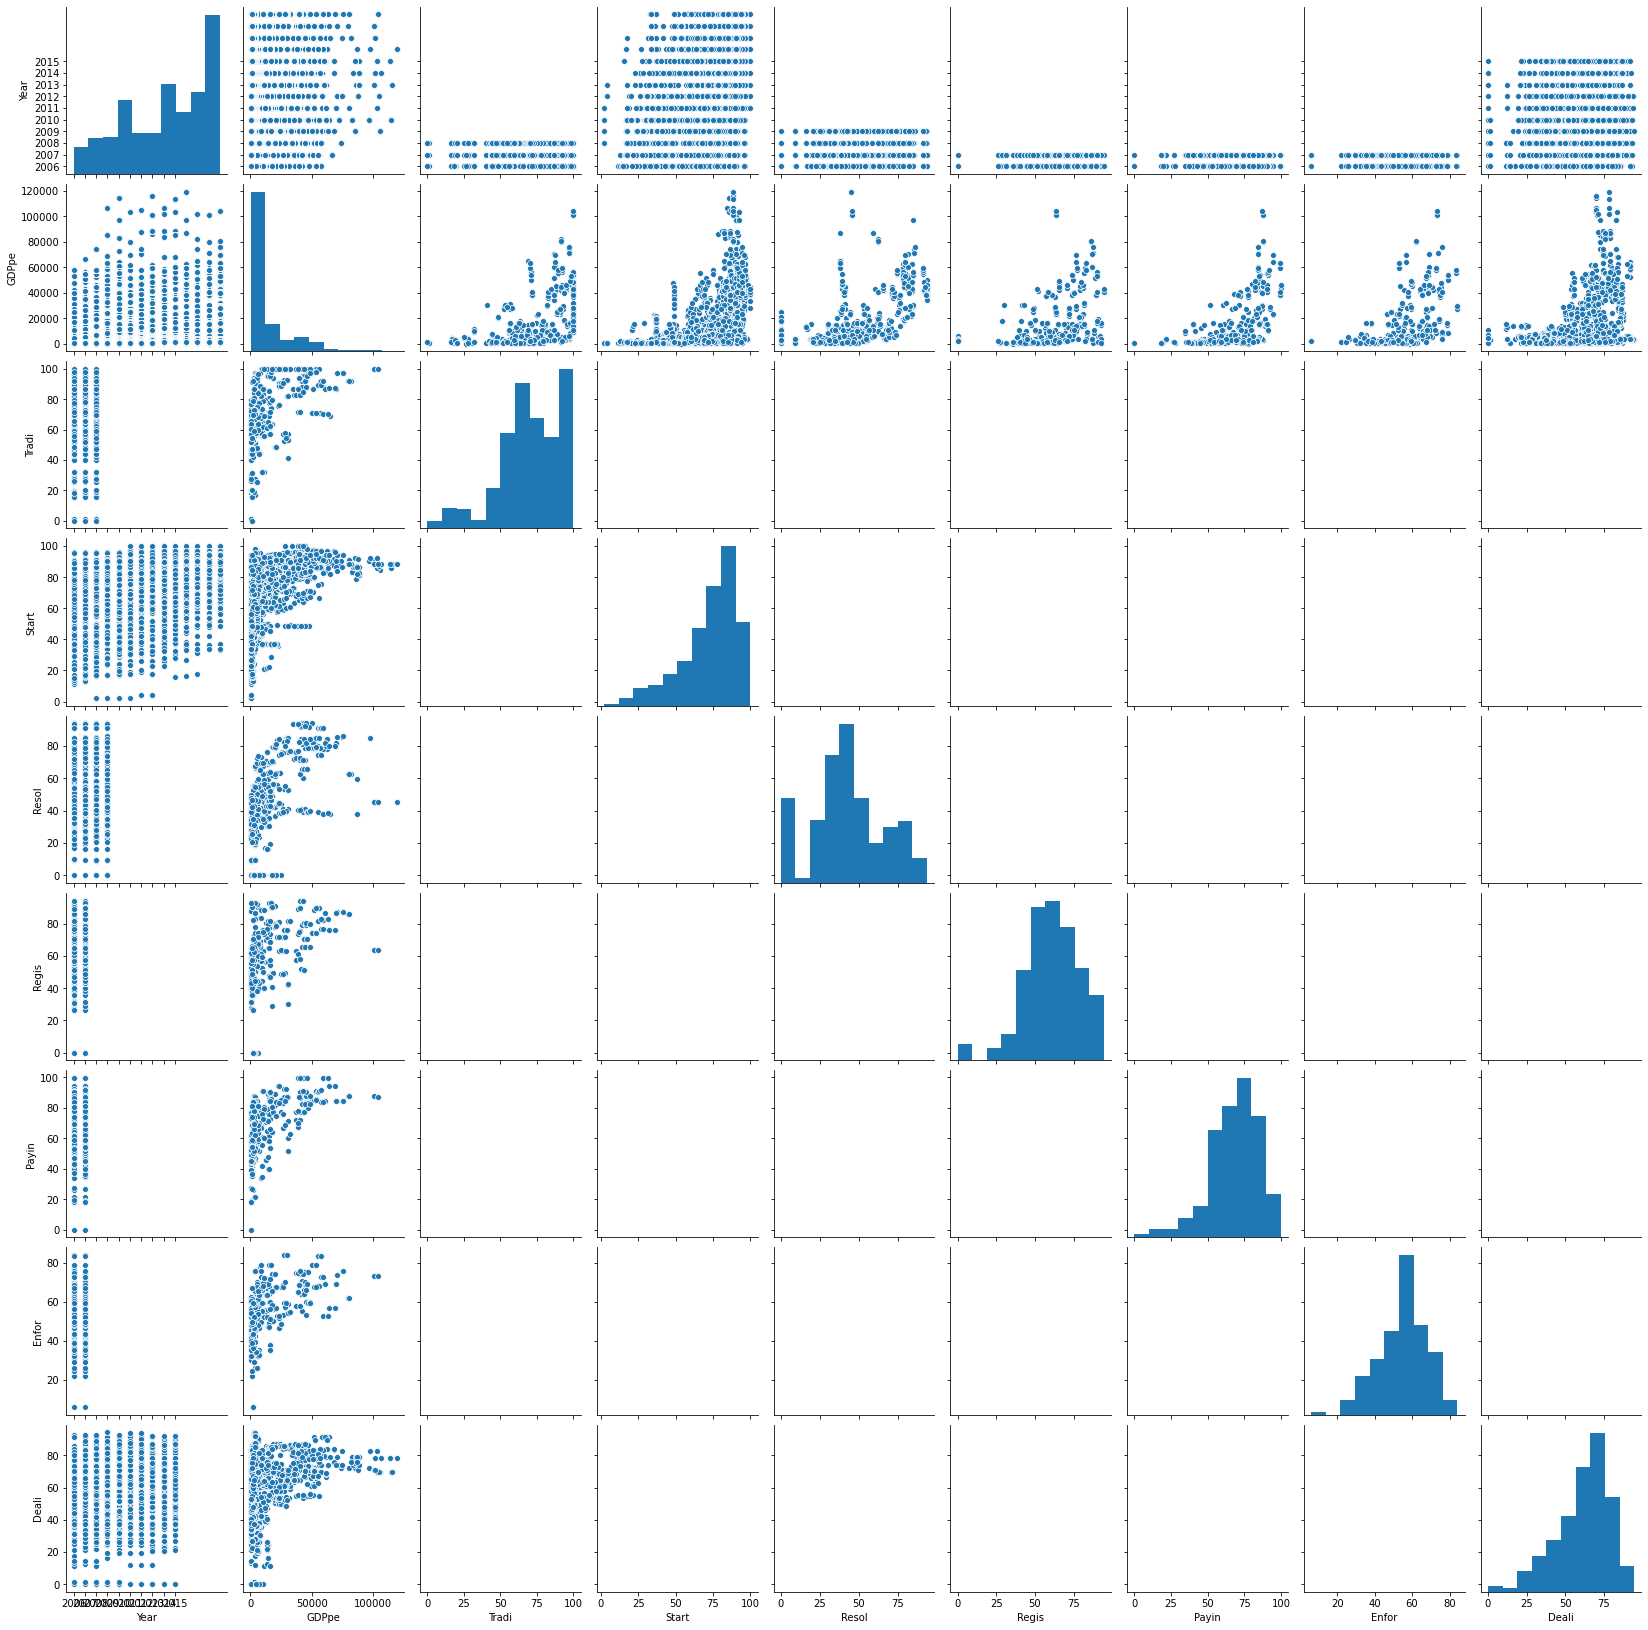

In [12]:
sns.pairplot(df_ease_business)

What are the 3 Ease of Doing Business variables most closely linked to GDP?

Answer by giving their correlation ratio, and give a possible explanation and a data visualization

Answer: 
The 3 Ease of Doing Business variables are : Resolving insolvency, paying taxes and enforcing contracts. These are characteristics shared by the countries with the greatest GDP. 


# 3. Chocolate Nobel question

In this repository is the academic paper `chocolate_nobel.pdf`. 

Explain in 3 paragraphs why this paper's conclusions are bad statistics.

The papers aims to verify whether there would be a correlation between a country's level of chocolate consumption and its population's cognitive function. The paper concludes that chocolate consumption enhances cognitive function, which is a sine qua non for winning the Nobel Prize, and it closely correlates with the number of Nobel laureates in each country. 

The conclusion's paper may be founded on questionable statistics for several factors. As indicated in the study limitations section, the specific chocolate intake of indvidual Nobel laureates of the past and present remains unknown. This appears to be a significant limitation as the study's conclusions are based on verifying the link between chocolate consumption and Nobel laureates. 

Furthermore, note that the paper makes the assumption that the number of Nobel laureate of each country considered in the study is representative of its population's cognitive function. This assumption carries some uncertainties. The data on chocolate consumption seems also to be incomplete and insufficient to carry out the study. 




